# Decision Trees

In [1]:
!pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://pypi.nubank.com.br/pypi/
You should consider upgrading via the '/Users/paulo.castro/miniconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Loading data

In [8]:
iris_dataset = load_iris(as_frame=True)

In [9]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Exploring

In [10]:
X = iris_dataset.data
X.shape

(150, 4)

In [11]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
y = iris_dataset.target
y.shape

(150,)

In [13]:
y.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [14]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Visualization

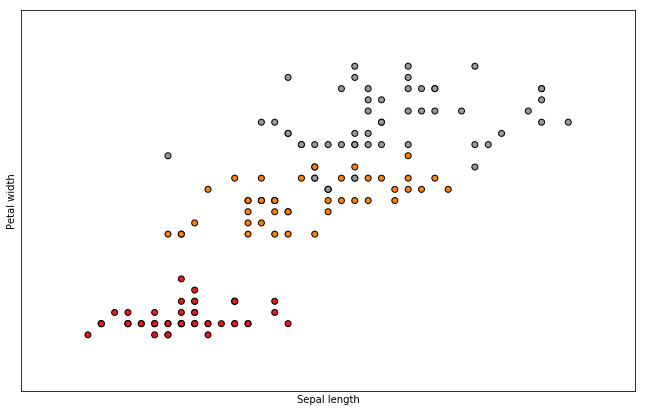

In [15]:
sepal_length = X.iloc[:, 0]
petal_width = X.iloc[:, 3]
x_min, x_max = sepal_length.min() - .5, sepal_length.max() + .5
y_min, y_max = petal_width.min() - .5, petal_width.max() + .5

plt.figure(2, figsize=(11, 7))
plt.clf()

# Plot the training points
plt.scatter(sepal_length, petal_width, c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Training a decision tree

### Only two features

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [0,3]], y, train_size=0.7, stratify=y, random_state=0)

In [17]:
X_train.head()

,sepal length (cm),petal width (cm)
144,6.7,2.5
117,7.7,2.2
115,6.4,2.3
22,4.6,0.2
28,5.2,0.2


In [18]:
X_train.shape

(105, 2)

In [19]:
X_test.shape

(45, 2)

In [26]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9555555555555556

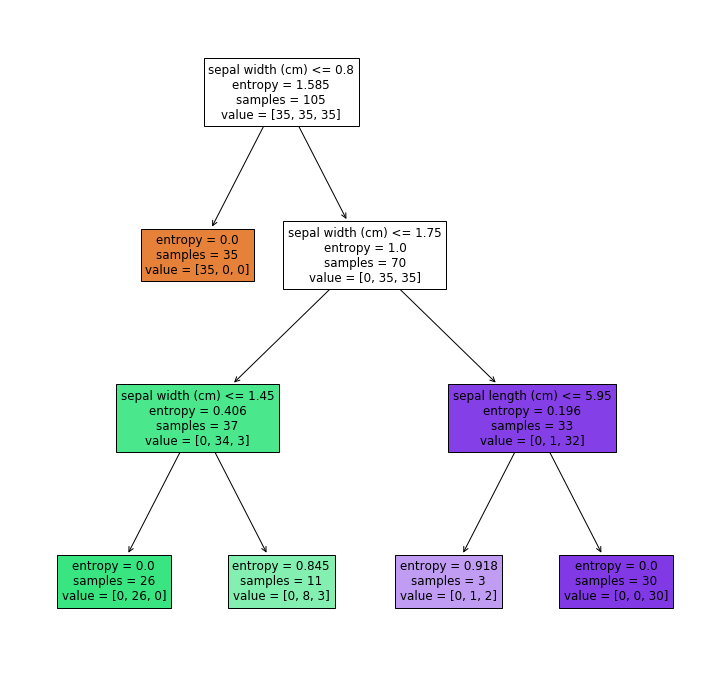

In [30]:
fig, ax = plt.subplots(figsize=(12,12))
plot_tree(model, ax=ax, feature_names=iris_dataset.feature_names, filled=True);

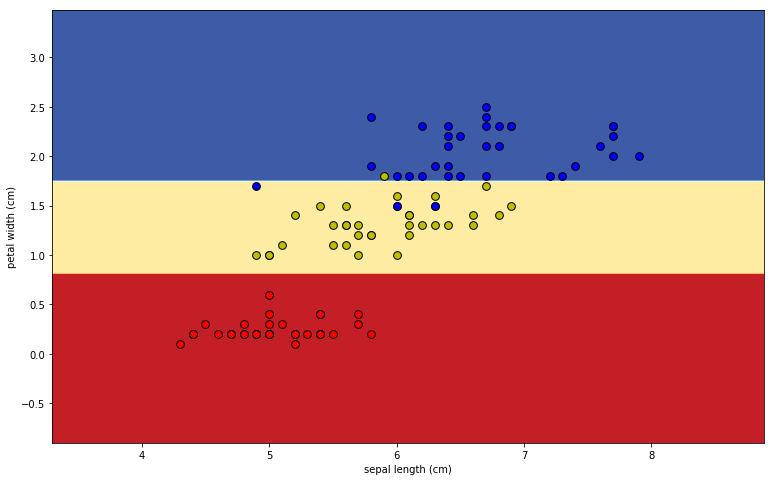

In [31]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

fig, ax = plt.subplots(figsize=(11,7))

# Plot the decision boundary
sepal_length = X.iloc[:, 0]
petal_width = X.iloc[:, 3]
x_min, x_max = sepal_length.min() - 1, sepal_length.max() + 1
y_min, y_max = petal_width.min() - 1, petal_width.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

ax.set_xlabel(iris_dataset.feature_names[0])
ax.set_ylabel(iris_dataset.feature_names[3])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == i)
    ax.scatter(X_train.iloc[idx[0], 0], X_train.iloc[idx[0], 1], c=color, label=iris_dataset.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=60)

### Training with all features

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=0)

In [33]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
144,6.7,3.3,5.7,2.5
117,7.7,3.8,6.7,2.2
115,6.4,3.2,5.3,2.3
22,4.6,3.6,1.0,0.2
28,5.2,3.4,1.4,0.2


In [34]:
X_train.shape

(105, 4)

In [35]:
X_test.shape

(45, 4)

In [41]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
y_pred = model.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.9555555555555556

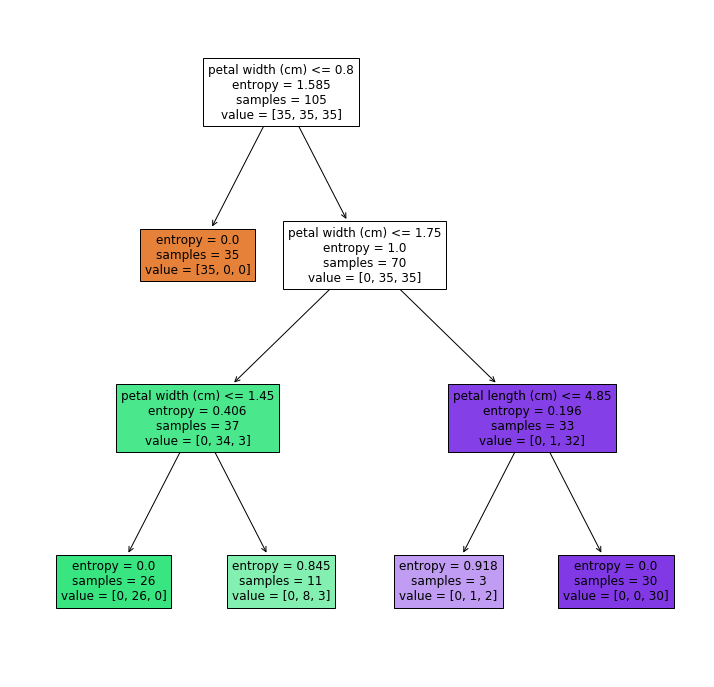

In [45]:
fig, ax = plt.subplots(figsize=(12,12))
plot_tree(model, ax=ax, feature_names=iris_dataset.feature_names, filled=True);